In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# Unsupervised methods


In supervised learning, we used known labels to predict unknown labels. In unsupervised learning, we don't have any labeled data to work with, and our primary goal is to identify structures or simplify our data so we can more easily summarize it, visualize it, or use it in a supervised model. In contrast to supervised learning, these methods are often more appropriate for exploratory analyses where you don't necessarily have a goal other than finding out how things "work" in your data. As a result, there's a lot more room for interpretation than you might encounter in other data analysis tasks.

We'll talk about two widely used unsupervised methods that are often used together: **k-means clustering** and  **principal components analysis**. (note: we actually talked about these briefly last week, but we'll explore them in a little more depth here)

## Clustering data with K-means

<div style="display: flex; width: 100%; min-height: 100vh;">
    <div style="width: 40%; padding: 0px;">
<p>Clustering methods like k-means are a way of identifying a set of groups with similar characteristics in some data. K-means clustering is one of the simplest and most commonly used methods for clustering. The <b>K</b> in "K-means" is some number of groups chosen by the researcher. </p>
    <p>The data set below includes some data on penguins recorded by biologists working in the Palmer archipelago in Antartica. The <code>bill_depth_mm</code> and <code>bill_length_mm</code> are measurements of the penguin's bills. Looking at the scatter plot of these measurements, you can probably eyeball some clear "groups" in the data. Reasonable people might disagree on whether there were 2 groups or 3, or maybe even 4, but there are clusters:
    </p>
    </div>
    <div style="width: 30%; background-color: #ffffff; padding: 20px;">
        <figure>
            <img src = 'https://cran.r-project.org/web/packages/palmerpenguins/readme/man/figures/culmen_depth.png' style="width:80%;">
            <a href= 'https://allisonhorst.github.io/palmerpenguins/'>source</a>
            </img>
        </figure>
    </div>
</div>

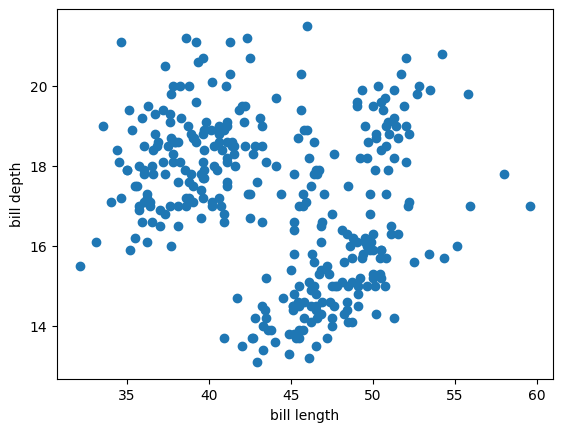

In [2]:
penguins = pd.read_csv('https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv').dropna()
plt.scatter(x=penguins['bill_length_mm'], y=penguins['bill_depth_mm'])
plt.xlabel('bill length')
plt.ylabel('bill depth')
plt.show()

Instead of just trying to eyeball it, we can use K-means clustering to identify a set of optimal clusters for this set of features. Specifically, K-means attempts to identify the cluster assignments that minimizes the total within-cluster sum of squares. Visually, you can think of it as trying to find clusters where all of the points are as close together as possible.

To use K-Means, we first need to mean-center and standardize our features so they all have mean = 0 and a standard deviation of 1. 

In [3]:


features = ['bill_length_mm', 'bill_depth_mm']
X = penguins[features] 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Note that scaling doesn't really change anything about the relative positions of any points in our dataset, it just ensures they are both centered on zero:

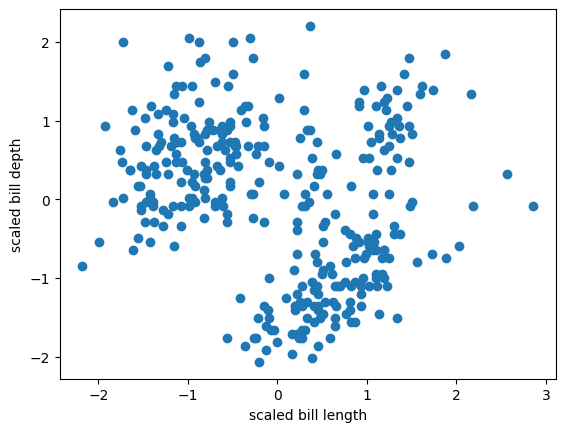

In [4]:
plt.scatter(X_scaled[:,0], X_scaled[:,1])
plt.xlabel('scaled bill length')
plt.ylabel('scaled bill depth')
plt.show()

Now we'll apply K-means clustering on the scaled data. We'll initialize a model by calling `KMeans` along with any additional options we want to specifiy. In this example, I'm going to assume there are three clusters, and I'll use the `random_state` variable to ensure reliability. Finally, I'll set the model up to use 10 random initalizations (this is a way to avoid becoming [stuck in a local minimum](https://stats.stackexchange.com/questions/487160/what-does-it-mean-for-the-k-means-algorithm-to-be-trapped-in-a-local-minimum))

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=99, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=99)

The `intertia` attribute is the total within cluster sum of squares value that the algorithm is attempting to optimize.

In [727]:
kmeans.inertia_

183.13482020132122

The `cluster_centers_` attribute is a K x J array with one row for each cluster and one column for each feature. The values are just the average of the (scaled) features within each cluster.

In [728]:
kmeans.cluster_centers_

array([[-0.95023997,  0.55393493],
       [ 0.58644397, -1.09805504],
       [ 1.0886843 ,  0.79503579]])

Putting the results in a data frame and adding the feature names can make this a little more readable, and can give you a sense of where each cluster is located in the data. ex: cluster 0 is on the low end of bill length and has moderate depth, while cluster 1 has moderate length and low bill depth. 

In [729]:
pd.DataFrame(kmeans.cluster_centers_, columns=features)

,bill_length_mm,bill_depth_mm
0,-0.950240,0.553935
1,0.586444,-1.098055
2,1.088684,0.795036


The `.labels_` attribute of our fitted model has the cluster assignments. This should have a numpy array with one element for each observation in our data, and the numbers should correspond to the value of `K`:

In [730]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1,

Right now, these are stored as a numpy array, but we can add them back to our original data frame as a new column to have them in Pandas format, then we can use this new column in visualizations and other analyses.

In [829]:
penguins['cluster'] = kmeans.labels_


Using a color map to assign colors to each cluster:

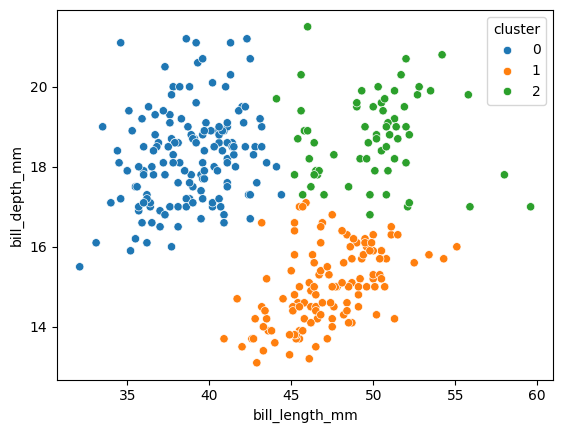

In [876]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='cluster')
plt.show()

Note that, in this instance, the clusters we identified roughly correspond to the different species in the penguins sampled:

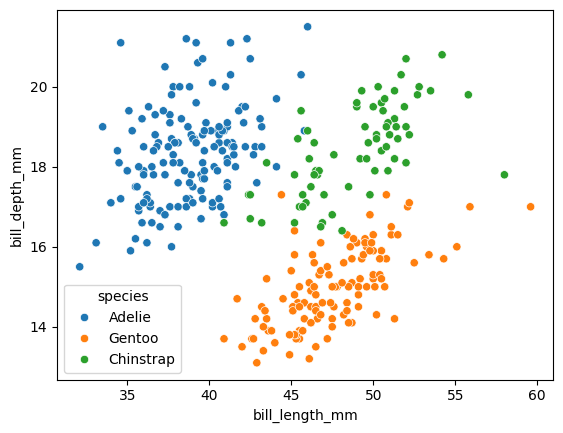

In [877]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

For the purposes of this example, we chose to use just two features and 3 categories, but in most practical scenarios where you would want to using K-means clustering, you'll have a lot more variables you're interested in. Foruntately, the logic here generalizes readily to higher dimensional data. If we want to visualize the results of a cluster analysis that uses more than two variables, we might consider using a dimensionality reduction method like the one we're discussing in the next section so we can get a two-dimensional representation of a higher dimensional data set.


<h3 style="color: red;font-weight: bold;">Question 1: Use <code>K-means</code> clustering on the <code>body_mass_g</code> and <code>flipper_length_mm</code> variables. Use your best judgement to select a value for <code>K</code> and create a scatter plot to visualize your results. </h3>

### Choosing values for K: the elbow method

Picking a number of clusters is often more of an art than a science. There are some wrong choices (it wouldn't make sense to use K=1) but there are usually multiple good values. The elbow method is a hueristic for picking a "good" value for `k` in K-means clustering. It doesn't give us a definitive answer, but it can help guide decision when you're not sure whether there are 4 groups or 5. To use it, we run K-means multiple times with increasing values of K and then we plot the total within cluster sum of squares for each iteration. The "elbow" is the point where the line bends sharply. Since the within cluster sum of squares is our measure of cluster quality, this "elbow" represents the point where we start to see diminishing returns for increasing values of K. 

In [6]:
# start with an empty list
wcss = []

# test out values from 2 to 20
for k in range(2, 20):
    # get K clusters
    kmeans = KMeans(n_clusters=k, random_state=99, n_init=5)
    kmeans.fit(X_scaled)
    # get the WCSS value (stored in the "interia_" attribute:
    wcss.append(kmeans.inertia_)
    
    

Based on the results, it looks like 3 or 4 clusters is plenty here. Additional values of "K" beyond that don't seem to improve things much. This makes sense given that we're only using two features here - there's just not a lot of complexity, and the clusters we identified already do a good job of explaining the variations in the data.

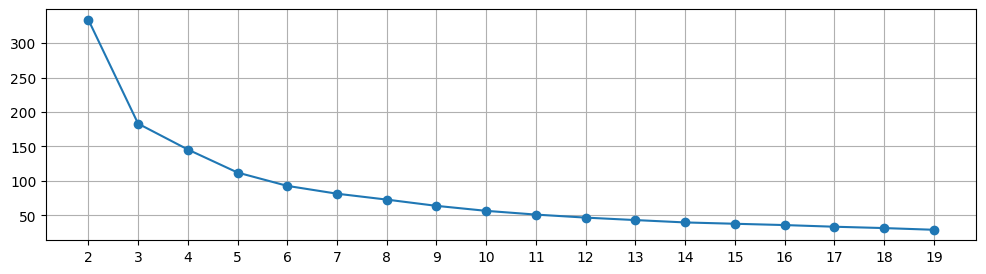

In [7]:
# plot the results
fig, ax = plt.subplots(figsize=(12, 3))
plt.plot(range(2, 20), wcss, marker='o')
ax.locator_params(axis='x', nbins=20)
plt.grid()
plt.show()

<div class="alert alert-block alert-info">
<h3>Note</h3>
K-means clustering is one of the most widely used methods for cluster analysis, but there are a variety of alternative models that may perform better for very large data sets, or in cases where clusters are defined by complex non-linear relationships. You can read a little more about some alternative clustering methods supported by scikit-learn <a href='https://scikit-learn.org/stable/modules/clustering.html'>here</a>. Some of these models, such as <a href='https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html'>DBSCAN</a> and <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.cluster.ward_tree.html'>Ward clustering</a>, will automatically choose a number of clusters based on some characteristics of the data. 
</div>


# PCA

Principal Components Analysis is an unsupervised dimensionality reduction technique that can help simplify large datasets with lots of correlated variables. If we have an `N x K` matrix of correlated variables, PCA will return a new `N x K` matrix with these properties:

1. The columns will be uncorrelated with each other.
2. The columns will be ordered by their importance. In other words, the first column will be some linear combination of the variables that explains the most variation in the data, the second column will explain the second most variation, and so on.

Taken together, these two properties mean that we can often use PCA to take a large number of correlated variables and create 2 or 3 new variables that capture most of the variance in our data. We can then use these results as inputs for a supervised machine learning model, or to do something like visualize a complex data set in a simple scatter plot.



For this section, we'll use some data on European political parties from the 2024 round of the [Chapel Hill Expert Survey](https://www.chesdata.eu/ches-europe) (CHES). The CHES project attempts estimate party positions and ideology by aggregating expert opinions. in essence they might ask 10 experts on UK politics to rank each of the major parties in terms of their support or opposition to increasing immigration, and then they would use the average responses to this question as a measure of Labor's immigration views.


In [3]:
ches = pd.read_csv("ches_data.csv")
ches.head()

,country,party_id,party,family,eu_position,lrecon,galtan,lrgen,immigrate_policy,multiculturalism,...,protectionism,regions,executive_power,judicial_independence,corrupt_salience,anti_islam,people_v_elite,eu_foreign,eu_intmark,eu_russia
0,Belgium,102,PS,Socialist,5.777778,2.444444,2.777778,2.555556,3.222222,3.111111,...,5.75,5.50,4.5,1.75,0.5,0.0,4.000000,5.0,3.5,4.500000
1,Belgium,103,Vooruit,Socialist,6.100000,4.100000,3.100000,4.300000,5.000000,5.111111,...,5.25,5.50,4.0,2.00,0.5,1.5,4.000000,5.0,4.5,3.333333
2,Belgium,104,Ecolo,Green,5.888889,2.444444,1.555556,2.444444,2.444444,2.428571,...,5.75,6.75,2.5,1.50,0.5,0.0,6.000000,5.5,5.0,6.000000
3,Belgium,105,Groen,Green,5.900000,2.700000,1.600000,2.500000,2.600000,2.555556,...,5.50,6.25,2.5,1.40,0.5,0.5,6.000000,5.5,5.0,4.666666
4,Belgium,106,MR,Liberal,6.444445,8.000000,5.222222,7.444445,6.500000,7.250000,...,1.75,6.25,6.5,4.25,0.5,5.0,2.666667,5.0,7.0,2.333333


Here are descriptions of the variables used below:

| Variable name  | Variable                                                                                                       | Values                                                                                                                                                                  |
|----------------|----------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| spendvtax      | Position on IMPROVING PUBLIC SERVICES VS. REDUCING TAXES during 2024                                           | 0 = strongly favors improving public services  <br>10 = strongly favors reducing taxes                                                                                  |
| redistribution | Next, where did these political parties stand on REDISTRIBUTION in 2024?                                       | 0 = strongly favors redistribution<br>10 = strongly opposes redistribution                                                                                              |
| climate_change | What was their position towards CLIMATE CHANGE POLICIES during 2024?                                           | 0 = strongly supports climate change policies even at the cost of economic growth<br>10 = strongly supports economic growth even at the cost of climate change policies |
| lgbtq_rights   | Position on policies supporting LGBTQ+ RIGHTS (e.g. marriage equality, adoption rights, transgender rights)    | 0 = strongly supports LGBTQ+ rights<br>10 = strongly opposes LGBTQ+ rights                                                                                              |
| eu_position    | How would you describe the GENERAL POSITION ON EUROPEAN INTEGRATION that the party leadership took during 2024 | 1 = strongly opposed<br>7 = strongly in favor                                                                                                                           |
| protectionism  | Position towards TRADE LIBERALIZATION/ PROTECTIONISM                                                           | 0 = strongly favors trade   liberalization<br>10 = strongly favors protection of domestic producer                                                                      |

We'll start by selecting 4 features of interest:

In [16]:

features = ['spendvtax', 'redistribution','climate_change', 'lgbtq_rights']
correlation_matrix = ches[features].corr()


We can start by examining a correlation matrix for these features. You'll notice that some of them are strongly correlated with each other. In some cases, correlations are strong enough that we might think that including them together in a model is potentially redundant. If we know a party's position of taxes and spending, we *probably* can make a good guess as to their position on taxes and spending because the two values are so strongly related. One way to think about the usefulness of dimensionality reduction is that it gives us a way to identify and eliminate this kind of redundancy.

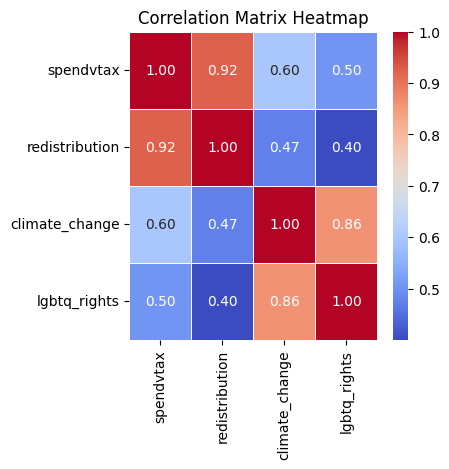

In [17]:
# using seaborn to visualize the correlation matrix as a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

To use PCA, we'll start by scaling the features (notice a trend?)

In [7]:


X = ches[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


We'll use initialize the PCA model, then use `pca.fit` to fit it to the data. Finally we'll use `transform` to apply the fitted model to the variables in X_scaled. 

In [8]:
pca = PCA()
prcomp = pca.fit(X_scaled)
compvalues = prcomp.transform(X_scaled)

We'll start by taking a look at the characteristics of the fitted model, then we'll try using `compvalues` for an analysis. 

The `explained_variance_ratio_` attribute of our fitted PCA model is an array that give the proportion of variance explained by each component of the new PCA matrix. 

In [9]:
prcomp.explained_variance_ratio_

array([0.72123174, 0.22909441, 0.03404039, 0.01563346])

You can read this as saying: "the first component explains about 72% of the variation, the second explains about 23% the third explains 3%... and so on. So, for this set of variables, we can explain over 90% of the variation in our data using just the first two components of this matrix.

We can also use the `prcomp.components_` to see the "loadings" or the importance of each feature in each component. Larger absolute values indicate that a feature is more strongly associated with a particular component, and negative/positive signs indicate that a feature is either positively or negatively associated with that component.

In [10]:
prcomp.components_

array([[ 0.52733333,  0.48744859,  0.50737092,  0.47632781],
       [ 0.42175242,  0.55654278, -0.45176991, -0.55523777],
       [ 0.09999956, -0.17974504,  0.70548098, -0.67822445],
       [ 0.73078351, -0.64834075, -0.20192893,  0.06953015]])

We get this as a numpy array, but we can make it a bit more readable by converting it to a Pandas Dataframe and naming each of the columns. Each row here represents a single component, and each column represents a specific feature. The first dimension is relatively equally associated with all for values, while the second dimnesion is positively associated with `spendvtax` and `redistribution` but negatively associated with `lgbtq_rights` and `climate_change` views.

In [38]:
components_df = pd.DataFrame(prcomp.components_, columns = features)
components_df.reset_index()

,index,spendvtax,redistribution,climate_change,lgbtq_rights
0,0,0.527333,0.487449,0.507371,0.476328
1,1,0.421752,0.556543,-0.451770,-0.555238
2,2,0.100000,-0.179745,0.705481,-0.678224
3,3,0.730784,-0.648341,-0.201929,0.069530


Since the first two principal components explain most of the variation in our data, we should be able to get a reasonable summary of our data by just visualizing observations on those first two component values. We'll extract those components and put them in a data frame, then we'll join this back up with our original data set so we can use the components for more analyses.

In [85]:
components_frame = pd.DataFrame(compvalues[:,:2], columns =['component 1', 'component 2'])
df = pd.concat([ches, components_frame], axis=1)


To visualize the results, we'll use plotly to create a visualization that shows each party's placement on these two axes. We'll also use a `hovertemplate` to display additional information about each point when hovering. This should allow us to get a good idea of what each component is picking up on:

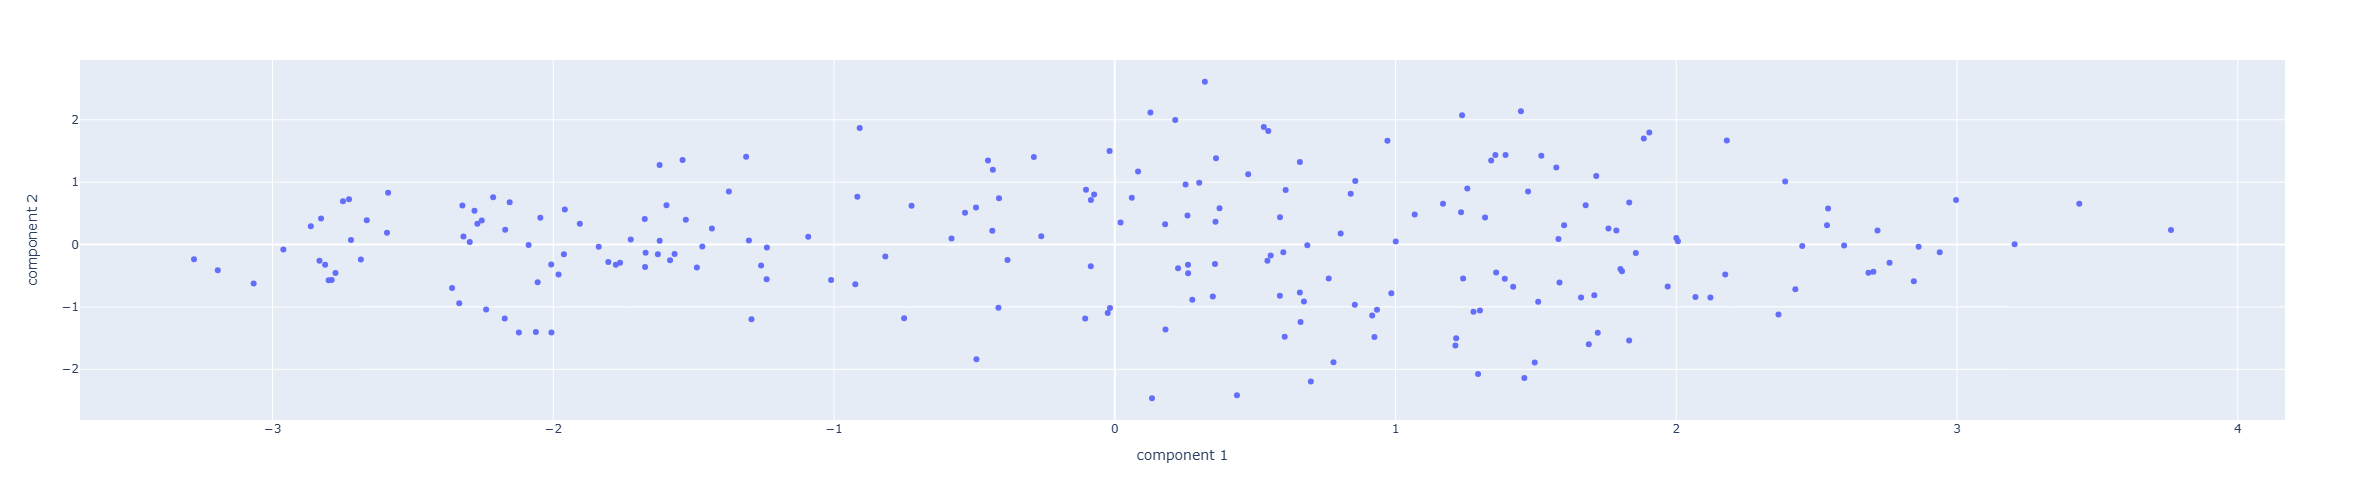

In [86]:
import plotly.express as px
fig = px.scatter(df, 
           x='component 1', 
           y='component 2',     
           custom_data =['party','family', 'country', 'spendvtax', 'redistribution', 'lgbtq_rights',
                        'climate_change'],
           width=600,   
           height=500 )
fig.update_traces(hovertemplate=
                  "<b>%{customdata[0]}</b>"
                  '<br>Family: %{customdata[1]}' +
                  "<br>Country: %{customdata[2]}" +
                  "<br>spendvtax: %{customdata[3]:.1f}" +
                  "<br>redistribution: %{customdata[4]:.1f}" +
                  "<br>lgbtq rights: %{customdata[5]:.1f}" +
                  "<br>climate change: %{customdata[6]:.1f}")

<h3 style="color: red;font-weight: bold;">Question 2: Use K-means clustering to identify groups of parties using the features from the previous steps. Create a color-coded version of the scatter plot above, where each point is color coded according to its cluster membership.</h3>



<h3 style="color: red;font-weight: bold;">Question 3: Repeat the above steps, but include <code>protectionism</code> and <code>eu_position</code> as additional features before performing PCA. Discuss the changes in your results and what they might mean.</h3>



### Basic steps for using PCA: 
1. Select a set of numeric features that are correlated (or, if they're categorical, convert them to numeric by dummy-coding)
2. Center and scale the features. 
3. Use your best judgement to select a value for K (you can always change it if your results don't seem right)
4. Perform PCA and examine the results.
5. Choose one or more principal components to use for your analysis. If you're trying to make a visualization, you probably just need the first two, but you could use more if you're using PCA to process features for a supervised model. 

Keep in mind that using less that the total number of available features effectively means you're throwing out some data. But, if a couple of features can already explain most of your variation, you're not losing much information and you gain the benefits of being able to simplify your model.